<a href="https://colab.research.google.com/github/JatinKhare/CharactRecog-py/blob/master/Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [155]:
from google.colab import drive
drive.mount('/content/drive')

import os

os.chdir('/content/drive/My Drive/GoogleColab/DigitRecognition')
os.listdir()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


['test.csv', 'train.csv', 'sample_submission.csv']

In [0]:
import os
import numpy as np
import skimage.io as io
import keras
import pandas as pd
import matplotlib.pyplot as plt
from keras.layers import *
from keras.utils import *
from keras.optimizers import Adam
from keras.models import *
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
import cv2

In [0]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [158]:
print(train.shape ,test.shape)
print(train)
print(train['label'].values.shape)

(42000, 785) (28000, 784)
       label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0          1       0       0       0       0       0       0       0       0   
1          0       0       0       0       0       0       0       0       0   
2          1       0       0       0       0       0       0       0       0   
3          4       0       0       0       0       0       0       0       0   
4          0       0       0       0       0       0       0       0       0   
5          0       0       0       0       0       0       0       0       0   
6          7       0       0       0       0       0       0       0       0   
7          3       0       0       0       0       0       0       0       0   
8          5       0       0       0       0       0       0       0       0   
9          3       0       0       0       0       0       0       0       0   
10         8       0       0       0       0       0       0       0       0   
11         9  

In [159]:
x_train = train.loc[:, 'pixel0':'pixel783'].values      #removing Labels
x_train.shape

(42000, 784)

In [160]:
x_train = np.array(x_train)
x_train.shape
x_train = x_train.reshape(42000,28,28,1)
x_train.shape

(42000, 28, 28, 1)

In [161]:
y_train = train['label'].values
y_train.reshape(-1,1).shape

(42000, 1)

In [162]:
test

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [163]:
x_test = test.loc[:,'pixel0':'pixel783'].values
x_test.shape

(28000, 784)

In [164]:
x_test = x_test.reshape(-1,28,28,1)
x_test.shape

(28000, 28, 28, 1)

In [165]:
y_train = np.array(y_train)
y_train = to_categorical(y_train)
y_train.shape

(42000, 10)

In [166]:
print(y_train.shape)
print(x_train.shape)

(42000, 10)
(42000, 28, 28, 1)


In [167]:
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(28*28*1,)))
model.add(BatchNormalization())
model.add(Dense(128, activation = 'relu'));
model.add(Dense(128, activation = 'relu'));
model.add(BatchNormalization())

model.add(Dense(256, activation = 'relu'));
model.add(BatchNormalization())

model.add(Dense(10, activation = 'sigmoid'));
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_116 (Dense)            (None, 64)                50240     
_________________________________________________________________
batch_normalization_69 (Batc (None, 64)                256       
_________________________________________________________________
dense_117 (Dense)            (None, 128)               8320      
_________________________________________________________________
dense_118 (Dense)            (None, 128)               16512     
_________________________________________________________________
batch_normalization_70 (Batc (None, 128)               512       
_________________________________________________________________
dense_119 (Dense)            (None, 256)               33024     
_________________________________________________________________
batch_normalization_71 (Batc (None, 256)               1024      
__________

In [0]:
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(rotation_range=20, rescale = 1./255,shear_range = 0.2,zoom_range = 0.2,horizontal_flip = True)

In [169]:
print(x_train.shape)
print(y_train.shape)

(42000, 28, 28, 1)
(42000, 10)


In [170]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
out = model.fit(x_train.reshape(-1, 28*28*1), y_train, epochs = 25, validation_split = 0.2)

Train on 33600 samples, validate on 8400 samples
Epoch 1/25
33600/33600 [==============================] - 12s 348us/step - loss: 0.5703 - acc: 0.8507 - val_loss: 0.2451 - val_acc: 0.9248
Epoch 2/25
33600/33600 [==============================] - 8s 252us/step - loss: 0.1989 - acc: 0.9378 - val_loss: 0.1392 - val_acc: 0.9557
Epoch 3/25
33600/33600 [==============================] - 9s 261us/step - loss: 0.1444 - acc: 0.9540 - val_loss: 0.1290 - val_acc: 0.9596
Epoch 4/25
33600/33600 [==============================] - 9s 254us/step - loss: 0.1212 - acc: 0.9615 - val_loss: 0.1129 - val_acc: 0.9661
Epoch 5/25
33600/33600 [==============================] - 9s 256us/step - loss: 0.0995 - acc: 0.9676 - val_loss: 0.1206 - val_acc: 0.9610
Epoch 6/25
33600/33600 [==============================] - 8s 252us/step - loss: 0.0867 - acc: 0.9713 - val_loss: 0.0997 - val_acc: 0.9690
Epoch 7/25
33600/33600 [==============================] - 8s 249us/step - loss: 0.0787 - acc: 0.9749 - val_loss: 0.1056 - 

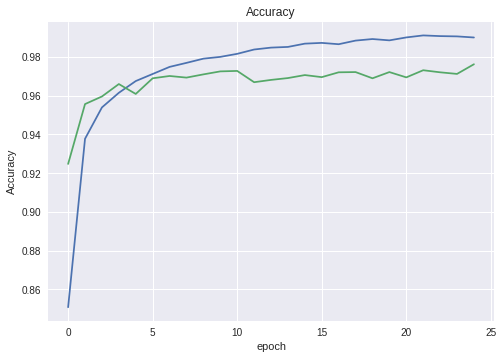

In [171]:
plt.plot(out.history['acc'])
plt.plot(out.history['val_acc'])
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.title('Accuracy')
plt.show()